In [42]:
%cd D:\\DataGlacier_Intern\\DataSets

D:\DataGlacier_Intern\DataSets


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [44]:
#import data
Cab_Data = pd.read_csv("Cab_Data.csv", header = 0)
City = pd.read_csv("City.csv", header = 0)
Customer_ID = pd.read_csv("Customer_ID.csv", header = 0)
Transaction_ID = pd.read_csv("Transaction_ID.csv", header = 0)

In [45]:
#merge data
Merged_Data = Cab_Data.merge(Transaction_ID, how="left", on="Transaction ID")
Merged_Data = Merged_Data.merge(Customer_ID, how="left", on="Customer ID")
Merged_Data = Merged_Data.merge(City, how="left", on="City")

In [46]:
#convert date of travel column to datetime type
Merged_Data["Date of Travel"] = pd.to_datetime(Merged_Data["Date of Travel"], unit="D", origin=pd.Timestamp('1900-01-01'))

In [47]:
#input month and season column
Merged_Data["Month of Travel"] = pd.DatetimeIndex(Merged_Data["Date of Travel"]).month
Merged_Data["Season"] = np.select(
    [
        (Merged_Data["Month of Travel"] == 12) |
        (Merged_Data["Month of Travel"] == 1) |
        (Merged_Data["Month of Travel"] == 2),
        (Merged_Data["Month of Travel"] == 3) |
        (Merged_Data["Month of Travel"] == 4) |
        (Merged_Data["Month of Travel"] == 5), 
        (Merged_Data["Month of Travel"] == 6) |
        (Merged_Data["Month of Travel"] == 7) |
        (Merged_Data["Month of Travel"] == 8),
        (Merged_Data["Month of Travel"] == 9) |
        (Merged_Data["Month of Travel"] == 10)|
        (Merged_Data["Month of Travel"] == 11)
    ],
    ["Winter", "Spring", "Summer", "Autumn"],
    default=0
)

In [69]:
Merged_Data[Merged_Data["Date of Travel"] == "2019-01-02"]

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Month of Travel,Season,Profit,Profit per km,Age Group
353891,10433076,2019-01-02,Pink Cab,ATLANTA GA,17.82,238.62,190.6740,29682,Cash,Male,60,24155,"814,885",24701,1,Winter,47.9460,2.690572,seniors
353902,10433087,2019-01-02,Pink Cab,AUSTIN TX,35.52,502.96,369.4080,33318,Card,Male,38,6130,"698,371",14978,1,Winter,133.5520,3.759910,young adults
353912,10433097,2019-01-02,Pink Cab,AUSTIN TX,28.50,411.40,336.3000,33427,Cash,Male,31,12266,"698,371",14978,1,Winter,75.1000,2.635088,young adults
353942,10433128,2019-01-02,Pink Cab,BOSTON MA,29.97,390.42,317.6820,59274,Card,Female,25,22928,"248,968",80021,1,Winter,72.7380,2.427027,youth
353945,10433131,2019-01-02,Pink Cab,BOSTON MA,27.27,370.20,324.5130,59768,Cash,Female,25,24526,"248,968",80021,1,Winter,45.6870,1.675358,youth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359262,10439960,2019-01-02,Yellow Cab,WASHINGTON DC,33.93,474.47,411.2316,52449,Card,Female,40,23569,"418,859",127001,1,Winter,63.2384,1.863790,young adults
359282,10439984,2019-01-02,Yellow Cab,WASHINGTON DC,40.00,641.78,484.8000,51614,Card,Female,55,12279,"418,859",127001,1,Winter,156.9800,3.924500,middle aged
359320,10440028,2019-01-02,Yellow Cab,WASHINGTON DC,26.22,405.25,327.2256,52389,Card,Female,29,5568,"418,859",127001,1,Winter,78.0244,2.975759,young adults
359326,10440034,2019-01-02,Yellow Cab,WASHINGTON DC,34.68,505.38,470.2608,51877,Cash,Male,46,16993,"418,859",127001,1,Winter,35.1192,1.012664,middle aged


In [49]:
Merged_Data["Season"].value_counts()

Autumn    119916
Winter     89881
Summer     82769
Spring     66826
Name: Season, dtype: int64

Text(0.5, 1.0, 'Transaction number for each company')

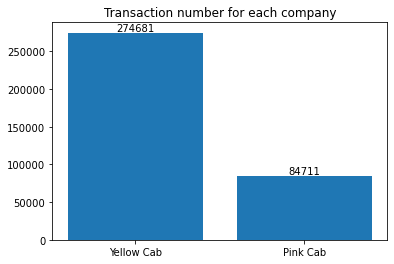

In [50]:
fig, ax = plt.subplots(1,1)
p1 = ax.bar(np.arange(2), Merged_Data["Company"].value_counts())
ax.bar_label(p1, label_type="edge")
ax.set_xticks(np.arange(2), labels=["Yellow Cab", "Pink Cab"])
ax.set_title("Transaction number for each company")

In [51]:
#convert Users column to int
Merged_Data["Users"] = Merged_Data["Users"].str.split(",")
Merged_Data["Users"] = Merged_Data["Users"].str.join(sep="")
Merged_Data["Users"] = pd.to_numeric(Merged_Data["Users"])
Merged_Data.dtypes

Transaction ID                 int64
Date of Travel        datetime64[ns]
Company                       object
City                          object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Customer ID                    int64
Payment_Mode                  object
Gender                        object
Age                            int64
Income (USD/Month)             int64
Population                    object
Users                          int64
Month of Travel                int64
Season                        object
dtype: object

In [52]:
#calculate total revenue for yellow cab
Yellow_Cab = Merged_Data[Merged_Data["Company"] == "Yellow Cab"]
mask2016_yellow = (Yellow_Cab["Date of Travel"]> "2016-01-01") & (Yellow_Cab['Date of Travel'] <= "2016-12-31")
mask2017_yellow = (Yellow_Cab["Date of Travel"]> "2017-01-01") & (Yellow_Cab['Date of Travel'] <= "2017-12-31")
mask2018_yellow = (Yellow_Cab["Date of Travel"]> "2018-01-01") & (Yellow_Cab['Date of Travel'] <= "2018-12-31")
Yellow_Cab_2016_Revenue = Yellow_Cab[mask2016_yellow]["Price Charged"].sum()
Yellow_Cab_2017_Revenue = Yellow_Cab[mask2017_yellow]["Price Charged"].sum()
Yellow_Cab_2018_Revenue = Yellow_Cab[mask2018_yellow]["Price Charged"].sum()
#total revenue for pink cab
Pink_Cab = Merged_Data[Merged_Data["Company"] == "Pink Cab"]
mask2016_pink = (Pink_Cab["Date of Travel"]> "2016-01-01") & (Pink_Cab['Date of Travel'] <= "2016-12-31")
mask2017_pink = (Pink_Cab["Date of Travel"]> "2017-01-01") & (Pink_Cab['Date of Travel'] <= "2017-12-31")
mask2018_pink = (Pink_Cab["Date of Travel"]> "2018-01-01") & (Pink_Cab['Date of Travel'] <= "2018-12-31")
Pink_Cab_2016_Revenue = Pink_Cab[mask2016_pink]["Price Charged"].sum()
Pink_Cab_2017_Revenue = Pink_Cab[mask2017_pink]["Price Charged"].sum()
Pink_Cab_2018_Revenue = Pink_Cab[mask2018_pink]["Price Charged"].sum()


Text(0.5, 1.0, 'Revenue for the two companies yearwise')

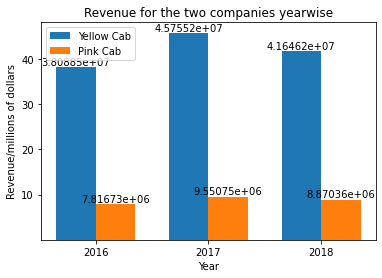

In [53]:
#draw plot
width = 0.35
fig, ax = plt.subplots(1,1)
p1 = ax.bar(
    np.arange(3) - width/2,
    np.array([Yellow_Cab_2016_Revenue, Yellow_Cab_2017_Revenue, Yellow_Cab_2018_Revenue]),
    width,
    label="Yellow Cab"
)
p2 = ax.bar(
    np.arange(3) + width/2,
    np.array([Pink_Cab_2016_Revenue, Pink_Cab_2017_Revenue, Pink_Cab_2018_Revenue]),
    width,
    label="Pink Cab"
)
ax.legend()
ax.set_xticks(np.arange(3), labels=["2016", "2017", "2018"])
ax.set_xlabel("Year")
ax.set_ylabel("Revenue/millions of dollars")
ax.ticklabel_format(axis="y", style="plain")
ax.set_yticks([10000000, 20000000, 30000000, 40000000], labels=["10", "20", "30", "40"])
ax.bar_label(p1, label_type="edge")
ax.bar_label(p2, label_type="edge")
ax.set_title("Revenue for the two companies yearwise")

In [54]:
#categorize city column
Merged_Data["City"] = Merged_Data["City"].astype("category")


In [55]:
City_Company_User = Merged_Data[["City", "Users"]].drop_duplicates()
City_Company_User = City_Company_User.set_index("City")


In [56]:
Yellow_City_CustomerNbr = Merged_Data[Merged_Data["Company"] == "Yellow Cab"].groupby("City")
Yellow_City_CustomerNbr = Yellow_City_CustomerNbr["Customer ID"].nunique()
Yellow_City_CustomerNbr.name="Yellow Cab"
City_User_Data = pd.concat([City_Company_User, Yellow_City_CustomerNbr], axis=1)
Pink_City_CustomerNbr = Merged_Data[Merged_Data["Company"] == "Pink Cab"].groupby("City")
Pink_City_CustomerNbr = Pink_City_CustomerNbr["Customer ID"].nunique()
Pink_City_CustomerNbr.name="Pink Cab"
City_User_Data = pd.concat([City_User_Data, Pink_City_CustomerNbr], axis=1)
City_User_Data["Yellow Cab Percentage"] = City_User_Data["Yellow Cab"]/City_User_Data["Users"]
City_User_Data["Pink Cab Percentage"] = City_User_Data["Pink Cab"]/City_User_Data["Users"]
City_User_Data

,Users,Yellow Cab,Pink Cab,Yellow Cab Percentage,Pink Cab Percentage
City,,,,,
ATLANTA GA,24701,2595,1322,0.105056,0.053520
AUSTIN TX,14978,1914,1354,0.127787,0.090399
BOSTON MA,80021,2997,2463,0.037453,0.030779
CHICAGO IL,164468,3000,2859,0.018241,0.017383
DALLAS TX,22157,2564,1118,0.115720,0.050458
DENVER CO,12421,1681,1145,0.135335,0.092183
LOS ANGELES CA,144132,2998,2996,0.020800,0.020787
MIAMI FL,17675,2334,1480,0.132051,0.083734
NASHVILLE TN,9270,965,1356,0.104099,0.146278


In [57]:
Merged_Data["Profit"] = Merged_Data["Price Charged"] - Merged_Data["Cost of Trip"]
Merged_Data["Profit per km"] = Merged_Data["Profit"]/Merged_Data["KM Travelled"]
Yellow_Cab_ProfitPerKM_2016 = Merged_Data[Merged_Data["Company"] == "Yellow Cab"][mask2016_yellow]["Profit per km"].mean()
Yellow_Cab_ProfitPerKM_2017 = Merged_Data[Merged_Data["Company"] == "Yellow Cab"][mask2017_yellow]["Profit per km"].mean()
Yellow_Cab_ProfitPerKM_2018 = Merged_Data[Merged_Data["Company"] == "Yellow Cab"][mask2018_yellow]["Profit per km"].mean()
Pink_Cab_ProfitPerKM_2016 = Merged_Data[Merged_Data["Company"] == "Pink Cab"][mask2016_pink]["Profit per km"].mean()
Pink_Cab_ProfitPerKM_2017 = Merged_Data[Merged_Data["Company"] == "Pink Cab"][mask2017_pink]["Profit per km"].mean()
Pink_Cab_ProfitPerKM_2018 = Merged_Data[Merged_Data["Company"] == "Pink Cab"][mask2018_pink]["Profit per km"].mean()

Text(0.5, 1.0, 'Average profit per km from 2016 to 2018')

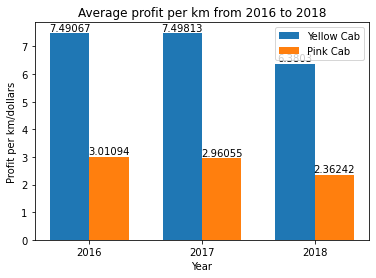

In [58]:
width = 0.35
fig, ax = plt.subplots(1,1)
p1 = ax.bar(
    np.arange(3) - width/2,
    [Yellow_Cab_ProfitPerKM_2016, Yellow_Cab_ProfitPerKM_2017, Yellow_Cab_ProfitPerKM_2018],
    width,
    label="Yellow Cab"
)
p2 = ax.bar(
    np.arange(3) + width/2,
    [Pink_Cab_ProfitPerKM_2016, Pink_Cab_ProfitPerKM_2017, Pink_Cab_ProfitPerKM_2018],
    width,
    label="Pink Cab"
)
ax.set_xticks(np.arange(3), labels=["2016", "2017", "2018"])
ax.set_xlabel("Year")
ax.set_ylabel("Profit per km/dollars")
ax.bar_label(p1, label_type="edge")
ax.bar_label(p2, label_type="edge")
ax.legend()
ax.set_title("Average profit per km from 2016 to 2018")

In [59]:
Merged_Data["Age Group"] = pd.cut(
    Merged_Data["Age"], 
    bins=[18, 25, 40, 55, 65], 
    labels=["youth", "young adults", "middle aged", "seniors"], 
    include_lowest=True
)
Merged_Data[Merged_Data["Company"] == "Yellow Cab"]["Age Group"].value_counts()

young adults    129805
youth            71224
middle aged      44658
seniors          28994
Name: Age Group, dtype: int64

Text(0.5, 1.0, 'Transaction number in different age groups')

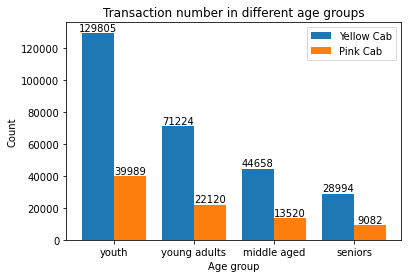

In [60]:
width = 0.4
fig, ax = plt.subplots(1,1)
p1 = ax.bar(
    np.arange(4) - width/2,
    Merged_Data[Merged_Data["Company"] == "Yellow Cab"]["Age Group"].value_counts(),
    width,
    label="Yellow Cab"
)
p2 = ax.bar(
    np.arange(4) + width/2,
    Merged_Data[Merged_Data["Company"] == "Pink Cab"]["Age Group"].value_counts(),
    width,
    label="Pink Cab"
)
ax.set_xticks(np.arange(4), labels=["youth", "young adults", "middle aged", "seniors"])
ax.set_xlabel("Age group")
ax.set_ylabel("Count")
ax.bar_label(p1, label_type="edge")
ax.bar_label(p2, label_type="edge")
ax.legend()
ax.set_title("Transaction number in different age groups")

In [61]:
Merged_Data["Season"] = Merged_Data["Season"].astype("category")
Merged_Data["Season"] = Merged_Data["Season"].cat.reorder_categories(["Spring", "Summer", "Autumn", "Winter"], ordered=True)
Merged_Data[Merged_Data["Company"] == "Pink Cab"]["Season"].value_counts()

Autumn    31096
Winter    20433
Summer    19953
Spring    13229
Name: Season, dtype: int64

Text(0.5, 1.0, 'Transaction number in different seasons')

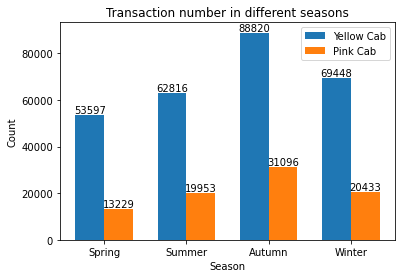

In [62]:
#seasonality
width = 0.35
fig, ax = plt.subplots(1,1)
p1 = ax.bar(
    np.arange(4) - width/2,
    Merged_Data[Merged_Data["Company"] == "Yellow Cab"]["Season"].value_counts(sort=False),
    width,
    label="Yellow Cab"
)
p2 = ax.bar(
    np.arange(4) + width/2,
    Merged_Data[Merged_Data["Company"] == "Pink Cab"]["Season"].value_counts(sort=False),
    width,
    label="Pink Cab"
)
ax.set_xticks(np.arange(4), labels=["Spring", "Summer", "Autumn", "Winter"])
ax.set_xlabel("Season")
ax.set_ylabel("Count")
ax.bar_label(p1, label_type="edge")
ax.bar_label(p2, label_type="edge")
ax.legend()
ax.set_title("Transaction number in different seasons")